Part A

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


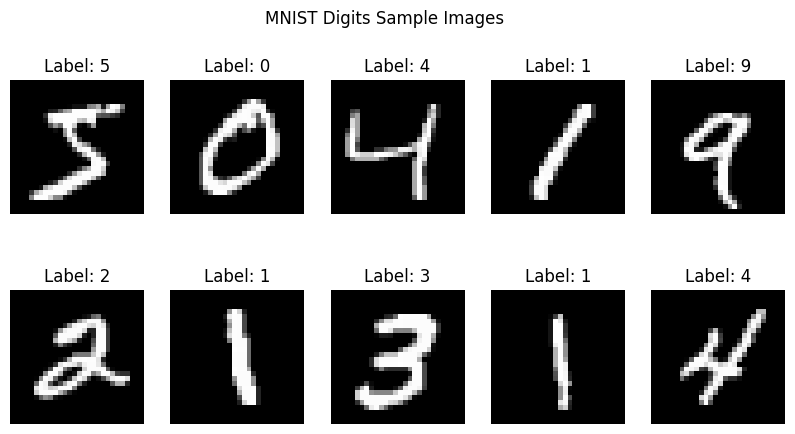

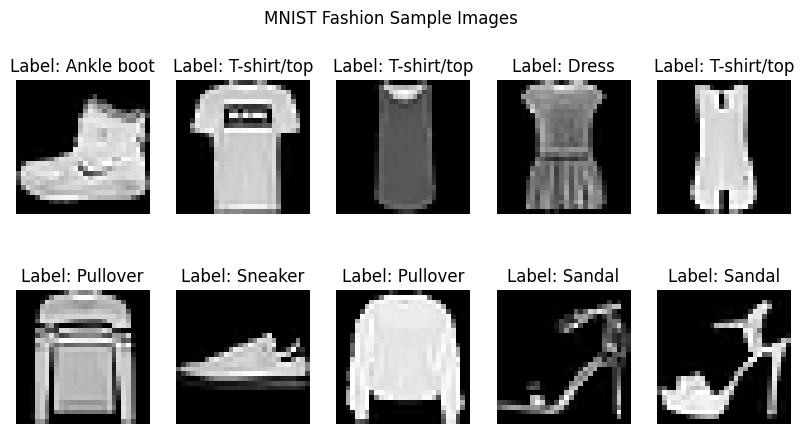

MNIST Digits Dataset:
Training samples: 60000, Testing samples: 10000
Image shape: (28, 28) 
Number of classes: 10, Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

MNIST Fashion Dataset:
Training samples: 60000, Testing samples: 10000
Image shape: (28, 28) 
Number of classes: 10, Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

def load_and_analyze_mnist_datasets():
    # Load MNIST Digits and MNIST Fashion datasets
    (digits_train, digits_train_labels), (digits_test, digits_test_labels) = tf.keras.datasets.mnist.load_data()
    (fashion_train, fashion_train_labels), (fashion_test, fashion_test_labels) = tf.keras.datasets.fashion_mnist.load_data()

    # Display sample images from both datasets
    def show_sample_images(dataset, labels, title, class_names=None):
        plt.figure(figsize=(10, 5))
        for i in range(10):
            plt.subplot(2, 5, i + 1)
            plt.imshow(dataset[i], cmap='gray')
            label = labels[i] if class_names is None else class_names[labels[i]]
            plt.title(f"Label: {label}")
            plt.axis('off')
        plt.suptitle(title)
        plt.show()

    digits_class_names = [str(i) for i in range(10)]
    fashion_class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    show_sample_images(digits_train, digits_train_labels, "MNIST Digits Sample Images", digits_class_names)
    show_sample_images(fashion_train, fashion_train_labels, "MNIST Fashion Sample Images", fashion_class_names)

    # Dataset Analysis
    print("MNIST Digits Dataset:")
    print(f"Training samples: {digits_train.shape[0]}, Testing samples: {digits_test.shape[0]}")
    print(f"Image shape: {digits_train.shape[1:]} ")
    print(f"Number of classes: {len(set(digits_train_labels))}, Classes: {digits_class_names}")

    print("\nMNIST Fashion Dataset:")
    print(f"Training samples: {fashion_train.shape[0]}, Testing samples: {fashion_test.shape[0]}")
    print(f"Image shape: {fashion_train.shape[1:]} ")
    print(f"Number of classes: {len(set(fashion_train_labels))}, Classes: {fashion_class_names}")

# Run the function
load_and_analyze_mnist_datasets()

Part B


In [4]:
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

class Generator(nn.Module):
    def __init__(self, input_dim=100):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28*28),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x).view(-1, 1, 28, 28)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x.view(-1, 28*28))

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

def train_gan(generator, discriminator, dataloader, epochs=50, lr=0.0002):
    criterion = nn.BCELoss()
    optimizer_G = optim.Adam(generator.parameters(), lr=lr)
    optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

    g_losses = []  # Store generator loss
    d_losses = []  # Store discriminator loss

    for epoch in range(epochs):
        for real_images, _ in dataloader:
            real_images = real_images.view(real_images.size(0), -1)
            batch_size = real_images.size(0)

            # Train Discriminator
            real_labels = torch.ones(batch_size, 1)
            fake_labels = torch.zeros(batch_size, 1)

            optimizer_D.zero_grad()
            real_output = discriminator(real_images)
            d_loss_real = criterion(real_output, real_labels)

            noise = torch.randn(batch_size, 100)
            fake_images = generator(noise)
            fake_output = discriminator(fake_images.detach())
            d_loss_fake = criterion(fake_output, fake_labels)

            d_loss = d_loss_real + d_loss_fake
            d_loss.backward()
            optimizer_D.step()

            # Train Generator
            optimizer_G.zero_grad()
            fake_output = discriminator(fake_images)
            g_loss = criterion(fake_output, real_labels)
            g_loss.backward()
            optimizer_G.step()

            # Store loss values
            g_losses.append(g_loss.item())
            d_losses.append(d_loss.item())

        print(f"Epoch {epoch+1}/{epochs}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

    # Plot Loss Curves
    plt.figure(figsize=(10,5))
    plt.plot(g_losses, label="Generator Loss")
    plt.plot(d_losses, label="Discriminator Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss Curves for GAN Training")
    plt.show()


In [9]:
def generate_images(generator, num_images=10, specific_digit=None):
    if specific_digit is not None:
        noise = torch.randn(num_images, 100)
        labels = torch.full((num_images,), specific_digit, dtype=torch.long)
    else:
        noise = torch.randn(num_images, 100)
    fake_images = generator(noise).detach()

    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(fake_images[i].squeeze(), cmap='gray')
        plt.axis('off')

    title = f"Generated Images of Digit {specific_digit}" if specific_digit is not None else "Generated Images"
    plt.suptitle(title) # Moved plt.suptitle to the end
    plt.show()


Epoch 1/30 | D Loss: 1.2556 | G Loss: 0.9760
Epoch 2/30 | D Loss: 1.1343 | G Loss: 1.2646
Epoch 3/30 | D Loss: 1.2674 | G Loss: 1.2373
Epoch 4/30 | D Loss: 0.9771 | G Loss: 1.1890
Epoch 5/30 | D Loss: 0.9996 | G Loss: 1.0538
Epoch 6/30 | D Loss: 1.2685 | G Loss: 2.1137
Epoch 7/30 | D Loss: 1.0010 | G Loss: 1.3084
Epoch 8/30 | D Loss: 1.1181 | G Loss: 0.8205
Epoch 9/30 | D Loss: 1.0376 | G Loss: 1.2137
Epoch 10/30 | D Loss: 1.0264 | G Loss: 0.7859
Epoch 11/30 | D Loss: 1.6861 | G Loss: 1.1389
Epoch 12/30 | D Loss: 0.5463 | G Loss: 1.5069
Epoch 13/30 | D Loss: 1.0087 | G Loss: 1.2661
Epoch 14/30 | D Loss: 0.9702 | G Loss: 1.3935
Epoch 15/30 | D Loss: 0.7176 | G Loss: 1.4764
Epoch 16/30 | D Loss: 0.5416 | G Loss: 1.7991
Epoch 17/30 | D Loss: 1.1146 | G Loss: 0.9834
Epoch 18/30 | D Loss: 0.8927 | G Loss: 1.6515
Epoch 19/30 | D Loss: 0.6565 | G Loss: 2.0511
Epoch 20/30 | D Loss: 0.9579 | G Loss: 1.4674
Epoch 21/30 | D Loss: 0.7461 | G Loss: 1.4713
Epoch 22/30 | D Loss: 1.1671 | G Loss: 1.11

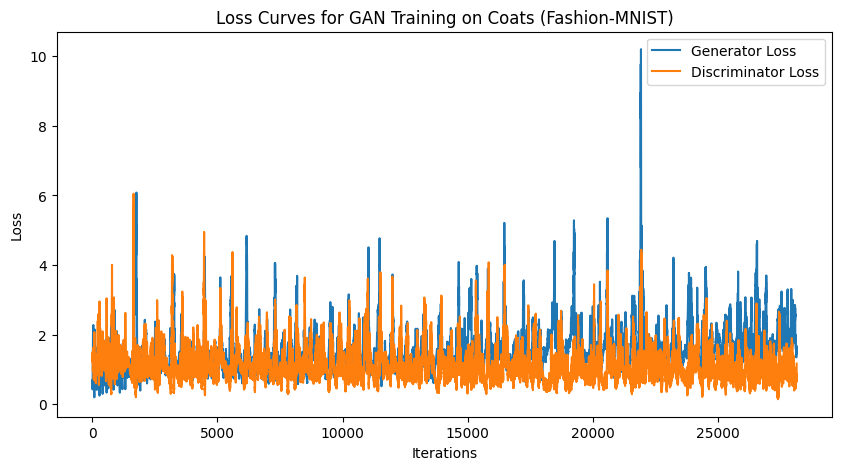

In [28]:
# Initialize the generator and discriminator
generator = Generator()
discriminator = Discriminator()

# Assuming you have a dataloader for MNIST dataset
# Replace this with your actual dataloader
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
dataloader = DataLoader(datasets.MNIST('./data', train=True, download=True, transform=transforms.ToTensor()), batch_size=64, shuffle=True)

# Train the GAN (commented out as it requires a dataloader)
train_gan(generator, discriminator, dataloader, epochs=30)


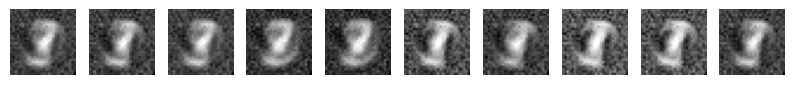

In [29]:
# Generate 5 random images (without specifying a digit)
generate_images(generator, num_images=10)


Roll no. Images: 5

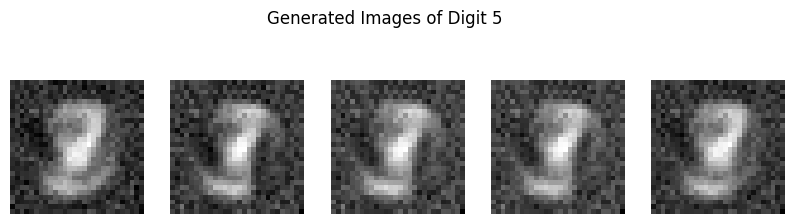

In [34]:
# Generate images of digit '5' (last digit of roll number)
generate_images(generator, num_images=5, specific_digit=5)


MINIST FASHION


100%|██████████| 26.4M/26.4M [00:02<00:00, 13.0MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 208kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.88MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 22.8MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



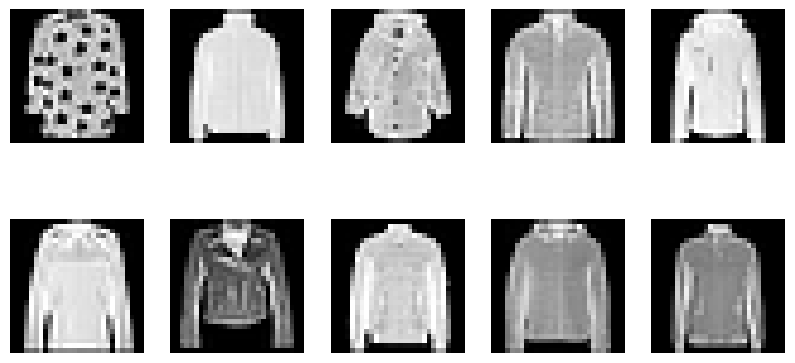

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt

# Load Fashion-MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1] for better GAN training
])

dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)

# Filter only "Coat" (class 4)
coat_indices = [i for i, (_, label) in enumerate(dataset) if label == 4]
coat_dataset = Subset(dataset, coat_indices)

# Create DataLoader
batch_size = 64
dataloader = DataLoader(coat_dataset, batch_size=batch_size, shuffle=True)

# Check sample images
examples = iter(dataloader)
sample_images, _ = next(examples)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(sample_images[i].squeeze(), cmap="gray")
    plt.axis("off")
plt.show()


In [15]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 28*28),  # Output size = 28x28
            nn.Tanh()  # Outputs in range [-1, 1] (because we normalized images)
        )

    def forward(self, z):
        return self.model(z).view(-1, 1, 28, 28)  # Reshape to image format

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()  # Outputs probability [0,1]
        )

    def forward(self, img):
        return self.model(img.view(img.size(0), -1))  # Flatten image


In [16]:
def train_gan(generator, discriminator, dataloader, epochs=50, lr=0.0002):
    criterion = nn.BCELoss()
    optimizer_G = optim.Adam(generator.parameters(), lr=lr)
    optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

    g_losses = []
    d_losses = []

    for epoch in range(epochs):
        for real_images, _ in dataloader:
            real_images = real_images.view(real_images.size(0), -1)
            batch_size = real_images.size(0)

            real_labels = torch.ones(batch_size, 1)
            fake_labels = torch.zeros(batch_size, 1)

            # Train Discriminator
            optimizer_D.zero_grad()
            real_output = discriminator(real_images)
            d_loss_real = criterion(real_output, real_labels)

            noise = torch.randn(batch_size, 100)
            fake_images = generator(noise)
            fake_output = discriminator(fake_images.detach())
            d_loss_fake = criterion(fake_output, fake_labels)

            d_loss = d_loss_real + d_loss_fake
            d_loss.backward()
            optimizer_D.step()

            # Train Generator
            optimizer_G.zero_grad()
            fake_output = discriminator(fake_images)
            g_loss = criterion(fake_output, real_labels)
            g_loss.backward()
            optimizer_G.step()

            g_losses.append(g_loss.item())
            d_losses.append(d_loss.item())

        print(f"Epoch {epoch+1}/{epochs} | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

    # Plot loss curves
    plt.figure(figsize=(10,5))
    plt.plot(g_losses, label="Generator Loss")
    plt.plot(d_losses, label="Discriminator Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss Curves for GAN Training on Coats (Fashion-MNIST)")
    plt.show()


Epoch 1/30 | D Loss: 1.1837 | G Loss: 0.5175
Epoch 2/30 | D Loss: 0.4143 | G Loss: 1.4338
Epoch 3/30 | D Loss: 1.2897 | G Loss: 1.1805
Epoch 4/30 | D Loss: 1.0383 | G Loss: 2.5834
Epoch 5/30 | D Loss: 1.2234 | G Loss: 1.9982
Epoch 6/30 | D Loss: 0.5031 | G Loss: 2.6138
Epoch 7/30 | D Loss: 0.2189 | G Loss: 2.8689
Epoch 8/30 | D Loss: 0.6745 | G Loss: 1.8443
Epoch 9/30 | D Loss: 0.2645 | G Loss: 2.2936
Epoch 10/30 | D Loss: 0.2435 | G Loss: 3.0217
Epoch 11/30 | D Loss: 0.4102 | G Loss: 1.7454
Epoch 12/30 | D Loss: 0.0761 | G Loss: 4.1877
Epoch 13/30 | D Loss: 1.3068 | G Loss: 3.4906
Epoch 14/30 | D Loss: 0.1750 | G Loss: 2.8900
Epoch 15/30 | D Loss: 2.7795 | G Loss: 3.4349
Epoch 16/30 | D Loss: 0.1525 | G Loss: 4.3135
Epoch 17/30 | D Loss: 0.1052 | G Loss: 4.1580
Epoch 18/30 | D Loss: 1.4481 | G Loss: 1.4513
Epoch 19/30 | D Loss: 0.9386 | G Loss: 2.2223
Epoch 20/30 | D Loss: 0.2980 | G Loss: 3.9744
Epoch 21/30 | D Loss: 0.0707 | G Loss: 3.5254
Epoch 22/30 | D Loss: 0.6663 | G Loss: 2.73

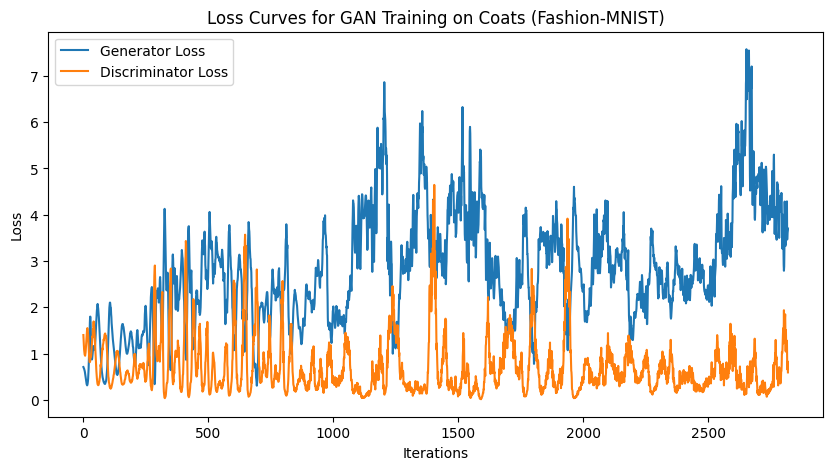

In [22]:
generator = Generator()
discriminator = Discriminator()
train_gan(generator, discriminator, dataloader, epochs=30)



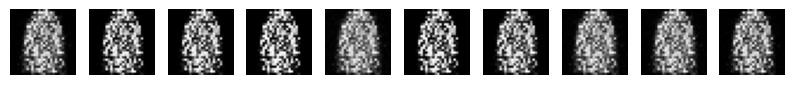

In [24]:
generate_images(generator, num_images=10)


Part C


In [ ]:
!pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 812.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

In [10]:
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

def load_and_analyze_mnist_datasets():
    # Load MNIST Digits and MNIST Fashion datasets
    (digits_train, digits_train_labels), (digits_test, digits_test_labels) = tf.keras.datasets.mnist.load_data()
    (fashion_train, fashion_train_labels), (fashion_test, fashion_test_labels) = tf.keras.datasets.fashion_mnist.load_data()

    # Normalize data
    digits_train, digits_test = digits_train / 255.0, digits_test / 255.0
    fashion_train, fashion_test = fashion_train / 255.0, fashion_test / 255.0

    return (digits_train, digits_train_labels), (digits_test, digits_test_labels), (fashion_train, fashion_train_labels), (fashion_test, fashion_test_labels)

# VAE Components
class Encoder(nn.Module):
    def __init__(self, latent_dim=2):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(28*28, 400)
        self.fc_mu = nn.Linear(400, latent_dim)
        self.fc_logvar = nn.Linear(400, latent_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

class Decoder(nn.Module):
    def __init__(self, latent_dim=2):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim, 400)
        self.fc2 = nn.Linear(400, 28*28)

    def forward(self, z):
        x = torch.relu(self.fc1(z))
        x = torch.sigmoid(self.fc2(x))
        return x

def reparameterization(mu, logvar):
    std = torch.exp(0.5 * logvar)
    eps = torch.randn_like(std)
    return mu + eps * std

class VAE(nn.Module):
    def __init__(self, latent_dim=2):
        super(VAE, self).__init__()
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = reparameterization(mu, logvar)
        return self.decoder(z), mu, logvar

In [11]:
def train_vae(vae, dataloader, epochs=50, lr=0.001):
    optimizer = optim.Adam(vae.parameters(), lr=lr)
    criterion = nn.BCELoss(reduction='sum')

    for epoch in range(epochs):
        for images, _ in dataloader:
            images = images.view(images.size(0), -1)
            optimizer.zero_grad()
            recon_images, mu, logvar = vae(images)

            recon_loss = criterion(recon_images, images)
            kl_div = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
            loss = recon_loss + kl_div

            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

def visualize_latent_space(vae, dataloader):
    vae.eval()
    with torch.no_grad():
        latent_vectors, labels = [], []
        for images, lbls in dataloader:
            images = images.view(images.size(0), -1)
            mu, _ = vae.encoder(images)
            latent_vectors.append(mu.numpy())
            labels.append(lbls.numpy())

        latent_vectors = np.concatenate(latent_vectors)
        labels = np.concatenate(labels)

        tsne = TSNE(n_components=2)
        transformed = tsne.fit_transform(latent_vectors)

        plt.scatter(transformed[:, 0], transformed[:, 1], c=labels, cmap='viridis')
        plt.colorbar()
        plt.title("Latent Space Visualization using t-SNE")
        plt.show()


In [12]:
def generate_vae_images(vae, num_images=10):
    vae.eval()
    with torch.no_grad():
        z = torch.randn(num_images, 2)
        generated_images = vae.decoder(z).view(-1, 28, 28)

        plt.figure(figsize=(10, 5))
        for i in range(num_images):
            plt.subplot(2, 5, i + 1)
            plt.imshow(generated_images[i], cmap='gray')
            plt.axis('off')
        plt.suptitle("Generated Images from VAE")
        plt.show()



Epoch 1/10, Loss: 5237.74169921875
Epoch 2/10, Loss: 5606.3623046875
Epoch 3/10, Loss: 5311.7421875
Epoch 4/10, Loss: 5098.9599609375
Epoch 5/10, Loss: 5166.2646484375
Epoch 6/10, Loss: 5413.39453125
Epoch 7/10, Loss: 4701.58349609375
Epoch 8/10, Loss: 5272.92138671875
Epoch 9/10, Loss: 4732.03857421875
Epoch 10/10, Loss: 5132.1943359375


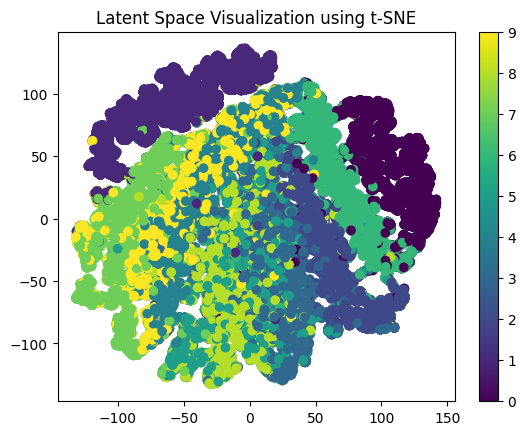

In [13]:
# Load dataset
(digits_train, digits_train_labels), (digits_test, digits_test_labels), (fashion_train, fashion_train_labels), (fashion_test, fashion_test_labels) = load_and_analyze_mnist_datasets()

# Convert to PyTorch tensors and create DataLoader
batch_size = 64
digits_train_tensor = torch.tensor(digits_train, dtype=torch.float32).unsqueeze(1)
digits_train_labels_tensor = torch.tensor(digits_train_labels, dtype=torch.long)
digits_train_loader = DataLoader(TensorDataset(digits_train_tensor, digits_train_labels_tensor), batch_size=batch_size, shuffle=True)

# Train VAE using DataLoader
vae = VAE(latent_dim=2)
train_vae(vae, digits_train_loader, epochs=10)

# Visualize Latent Space
visualize_latent_space(vae, digits_train_loader)


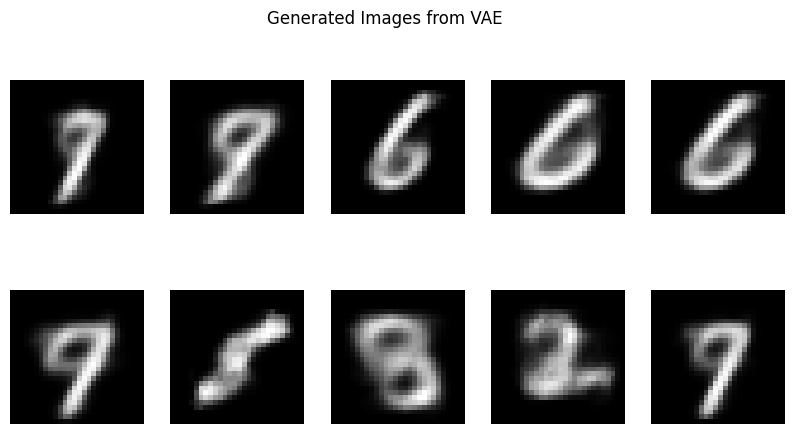

In [39]:
# Generate Images
generate_vae_images(vae, num_images=10)

Generation of specific digits

In [44]:
def extract_latent_vectors(vae, dataloader):
    vae.eval()
    stored_latent_vectors = []
    stored_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.view(images.size(0), -1)
            mu, _ = vae.encoder(images)
            stored_latent_vectors.append(mu.numpy())
            stored_labels.append(labels.numpy())

    return np.concatenate(stored_latent_vectors), np.concatenate(stored_labels)

def generate_specific_digit_from_latent(vae, stored_latent_vectors, stored_labels, target_digit, num_images=5):
    vae.eval()
    target_indices = np.where(stored_labels == target_digit)[0][:num_images]
    selected_latent_vectors = torch.tensor(stored_latent_vectors[target_indices], dtype=torch.float32)
    generated_images = vae.decoder(selected_latent_vectors).view(-1, 28, 28)

    plt.figure(figsize=(10, 5))
    for i in range(len(generated_images)):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(generated_images[i], cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Generated Images of Digit {target_digit}")
    plt.show()

Epoch 1/10, Loss: 4659.60302734375
Epoch 2/10, Loss: 5146.90869140625
Epoch 3/10, Loss: 5153.16259765625
Epoch 4/10, Loss: 5226.76318359375
Epoch 5/10, Loss: 5373.3349609375
Epoch 6/10, Loss: 5192.31640625
Epoch 7/10, Loss: 4620.080078125
Epoch 8/10, Loss: 5167.81787109375
Epoch 9/10, Loss: 5427.203125
Epoch 10/10, Loss: 4839.43798828125


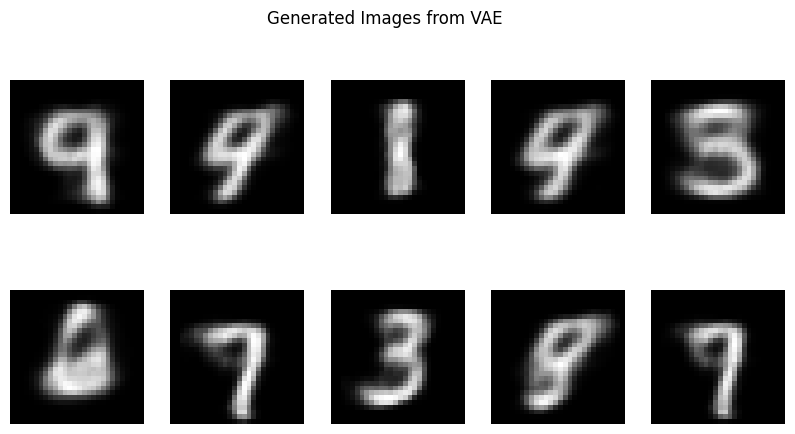

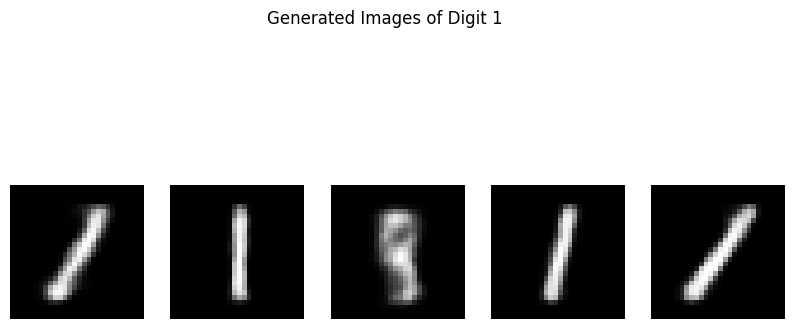

In [43]:
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.manifold import TSNE

def generate_specific_digit(vae, dataloader, target_digit, num_images=5):
    vae.eval()
    with torch.no_grad():
        latent_vectors, labels = [], []
        for images, lbls in dataloader:
            images = images.view(images.size(0), -1)
            mu, _ = vae.encoder(images)
            latent_vectors.append(mu.numpy())
            labels.append(lbls.numpy())

        latent_vectors = np.concatenate(latent_vectors)
        labels = np.concatenate(labels)

        target_indices = np.where(labels == target_digit)[0][:num_images]
        selected_latent_vectors = torch.tensor(latent_vectors[target_indices], dtype=torch.float32)
        generated_images = vae.decoder(selected_latent_vectors).view(-1, 28, 28)

        plt.figure(figsize=(10, 5))
        for i in range(len(generated_images)):
            plt.subplot(1, num_images, i + 1)
            plt.imshow(generated_images[i], cmap='gray')
            plt.axis('off')
        plt.suptitle(f"Generated Images of Digit {target_digit}")
        plt.show()

def generate_vae_images(vae, num_images=10):
    vae.eval()
    with torch.no_grad():
        z = torch.randn(num_images, 2)
        generated_images = vae.decoder(z).view(-1, 28, 28)

        plt.figure(figsize=(10, 5))
        for i in range(num_images):
            plt.subplot(2, 5, i + 1)
            plt.imshow(generated_images[i], cmap='gray')
            plt.axis('off')
        plt.suptitle("Generated Images from VAE")
        plt.show()
# Load MNIST Digits dataset
(digits_train, digits_train_labels), (digits_test, digits_test_labels) = tf.keras.datasets.mnist.load_data()


(fashion_train, fashion_train_labels), (fashion_test, fashion_test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Convert to PyTorch tensors and create DataLoader
batch_size = 64
digits_train_tensor = torch.tensor(digits_train / 255.0, dtype=torch.float32).view(-1, 28*28)
digits_train_labels_tensor = torch.tensor(digits_train_labels, dtype=torch.long)
digits_train_loader = DataLoader(TensorDataset(digits_train_tensor, digits_train_labels_tensor), batch_size=batch_size, shuffle=True)

# Train VAE
vae = VAE(latent_dim=2)
train_vae(vae, digits_train_loader, epochs=10)

# Generate random images from trained VAE
generate_vae_images(vae, num_images=10)

# Generate images of specific digit (e.g., "1")
generate_specific_digit(vae, digits_train_loader, target_digit=1, num_images=5)


Part D


**Comparison of GAN vs. VAE**

**a. Image Quality**

* GANs generally produce sharper and more realistic images compared to VAEs. This is because GANs use an adversarial loss that forces the generator to produce images indistinguishable from real data.
* VAEs, on the other hand, often generate blurrier images due to the nature of their probabilistic reconstruction loss (which encourages smoothness in the latent space but sacrifices fine details).

**b. Training Stability**
* GANs are harder to train due to the delicate balance between the generator and discriminator. If one outpaces the other, training collapses. Mode collapse is another common issue where the generator produces limited variety.
* VAEs are easier to train, as they use a well-defined probabilistic loss function based on maximum likelihood, avoiding adversarial instability. However, they require careful tuning of the KL divergence weight.
Winner: VAEs for stability.

**c. Latent Space Representation**
* GANs do not explicitly learn a structured latent space. Instead, they learn a mapping from noise to data, but interpolations in the latent space are not always meaningful.
* VAEs explicitly enforce a structured latent space by using a prior distribution (usually Gaussian). This makes VAEs useful for interpolation and semantic feature learning in the latent space.
Winner: VAEs for meaningful latent space representation.



**Potential Improvements with Hyperparameter Tuning**

**For GANs:**
* Adjust Learning Rates – Using separate learning rates for the generator and discriminator (e.g., 1e-4 for generator, 4e-4 for discriminator) can stabilize training.
* Use Feature Matching Loss – Instead of purely binary classification loss, use a perceptual loss (e.g., Wasserstein loss in WGAN).
* Improve Architecture – Use batch normalization, spectral normalization, and progressive growing for better image quality.

**For VAEs:**
* KL Annealing – Gradually increasing the KL divergence weight over epochs can prevent poor latent space learning.
* Increase Latent Dimension – A higher latent dimension (e.g., 50-100 instead of 10-20) allows for richer representations.
* Better Priors – Instead of a simple Gaussian prior, use more flexible priors like normalizing flows to capture complex distributions.

PART 5


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Generate synthetic dataset with 30% anomalies and save to CSV
def generate_and_save_dataset(filename="anomaly_data.csv", size=10000, anomaly_ratio=0.3):
    normal_data = np.random.normal(loc=0.0, scale=1.0, size=(int(size * (1 - anomaly_ratio)), 28*28))
    anomaly_data = np.random.uniform(low=-3, high=3, size=(int(size * anomaly_ratio), 28*28))

    data = np.vstack((normal_data, anomaly_data))
    labels = np.hstack((np.zeros(len(normal_data)), np.ones(len(anomaly_data))))

    df = pd.DataFrame(data)
    df['label'] = labels
    df.to_csv(filename, index=False)
    print(f"Dataset saved to {filename}")

# Generate and save dataset
generate_and_save_dataset()

# Load dataset from CSV
def load_dataset(filename="anomaly_data.csv"):
    df = pd.read_csv(filename)
    labels = df['label'].values
    data = df.drop(columns=['label']).values
    return torch.tensor(data, dtype=torch.float32), torch.tensor(labels, dtype=torch.long)



Dataset saved to anomaly_data.csv


In [19]:
data, labels = load_dataset()
dataset = DataLoader(TensorDataset(data, labels), batch_size=64, shuffle=True)

class VAE(nn.Module):
    def __init__(self, input_dim=28*28, latent_dim=2):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, 400)
        self.fc_mu = nn.Linear(400, latent_dim)
        self.fc_logvar = nn.Linear(400, latent_dim)
        self.fc3 = nn.Linear(latent_dim, 400)
        self.fc4 = nn.Linear(400, input_dim)

    def encode(self, x):
        h = torch.relu(self.fc1(x))
        mu, logvar = self.fc_mu(h), self.fc_logvar(h)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = torch.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h))

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

vae = VAE()
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

def vae_loss(recon_x, x, mu, logvar):
    mse = nn.functional.mse_loss(recon_x, x, reduction='sum')
    kl = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return mse + kl

def train_vae(vae, dataloader, epochs=10):
    vae.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in dataloader:
            x_batch = batch[0]
            optimizer.zero_grad()
            recon, mu, logvar = vae(x_batch)
            loss = vae_loss(recon, x_batch, mu, logvar)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(dataloader.dataset):.4f}")



In [20]:
def anomaly_detection_vae(vae, dataloader, threshold=0.1):
    vae.eval()
    recon_errors = []
    true_labels = []

    with torch.no_grad():
        for batch in dataloader:
            x_batch, labels_batch = batch[0], batch[1]
            recon, _, _ = vae(x_batch)
            loss = torch.sum((x_batch - recon) ** 2, dim=1)
            recon_errors.extend(loss.numpy())
            true_labels.extend(labels_batch.numpy())

    recon_errors = np.array(recon_errors)
    true_labels = np.array(true_labels)

    thresholds = np.linspace(np.min(recon_errors), np.max(recon_errors), 100)
    accuracies = [np.mean((recon_errors > t) == true_labels) for t in thresholds]
    best_threshold = thresholds[np.argmax(accuracies)]
    predictions = (recon_errors > best_threshold).astype(int)

    print("Confusion Matrix:")
    print(confusion_matrix(true_labels, predictions))
    print("\nClassification Report:")
    print(classification_report(true_labels, predictions))

    return predictions

# Train VAE
train_vae(vae, dataset, epochs=10)

# Anomaly Detection using VAE
anomalies = anomaly_detection_vae(vae, dataset)

Epoch 1/10, Loss: 1266.5571
Epoch 2/10, Loss: 1254.5690
Epoch 3/10, Loss: 1253.9182
Epoch 4/10, Loss: 1253.7370
Epoch 5/10, Loss: 1253.6700
Epoch 6/10, Loss: 1253.6074
Epoch 7/10, Loss: 1253.5433
Epoch 8/10, Loss: 1253.4422
Epoch 9/10, Loss: 1253.4185
Epoch 10/10, Loss: 1253.3367
Confusion Matrix:
[[7000    0]
 [   0 3000]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7000
           1       1.00      1.00      1.00      3000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



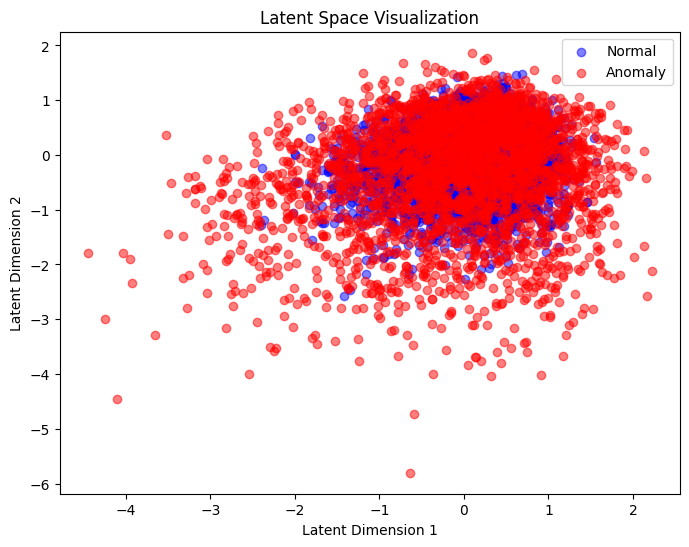

In [21]:
# Visualize the Latent Space
def visualize_latent_space(vae, dataloader):
    vae.eval()
    all_mu = []
    true_labels = []

    with torch.no_grad():
        for batch in dataloader:
            x_batch, labels_batch = batch[0], batch[1]
            mu, _ = vae.encode(x_batch)
            all_mu.append(mu.numpy())
            true_labels.append(labels_batch.numpy())

    all_mu = np.concatenate(all_mu, axis=0)
    true_labels = np.concatenate(true_labels, axis=0)

    plt.figure(figsize=(8,6))
    plt.scatter(all_mu[true_labels == 0, 0], all_mu[true_labels == 0, 1], c='blue', alpha=0.5, label='Normal')
    plt.scatter(all_mu[true_labels == 1, 0], all_mu[true_labels == 1, 1], c='red', alpha=0.5, label='Anomaly')
    plt.xlabel("Latent Dimension 1")
    plt.ylabel("Latent Dimension 2")
    plt.title("Latent Space Visualization")
    plt.legend()
    plt.show()

# Generate latent space visualization
visualize_latent_space(vae, dataset)
